In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [40]:
df = pd.read_csv("3-customersatisfaction.csv")

In [41]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [42]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [43]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


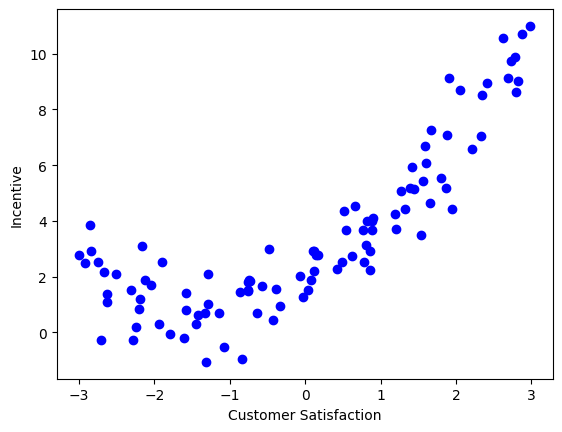

In [45]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")

plt.show()

In [46]:
#features

In [47]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [48]:
#train - test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.2)

In [50]:
#Scale & Create Model

In [51]:
regression = LinearRegression()
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
#Prediction

In [55]:
y_pred = regression.predict(X_test)

In [56]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [57]:
r2 = r2_score(y_test, y_pred)

In [58]:
r2 #Terrible r2 score. Model cannot predict well with simple linear regression

0.2705652535622246

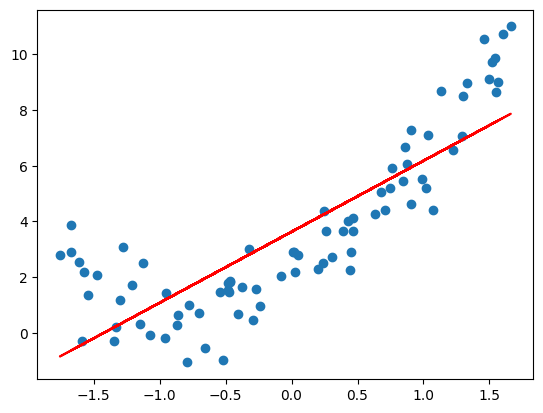

In [59]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color="r")

plt.show()

In [60]:
#Try polinomial regression to see if model performs better

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [62]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [63]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [64]:
regression = LinearRegression()

In [65]:
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred = regression.predict(X_test_poly)

In [67]:
r2 = r2_score(y_test, y_pred)

In [69]:
r2 #Much better score

0.7685687698788557

In [70]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [71]:
regression.intercept_

np.float64(2.076676429793281)

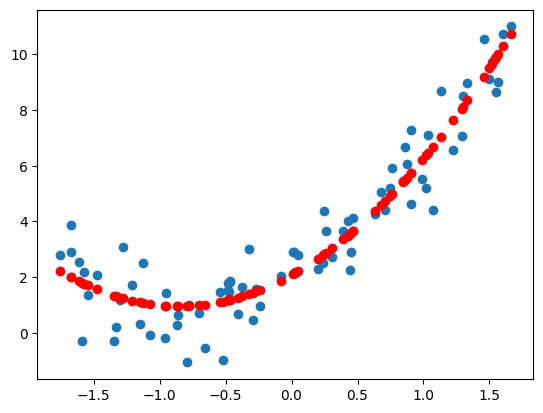

In [72]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color="r")

plt.show()

In [73]:
#Let's try a higher degree and see if it performs even better

In [74]:
poly = PolynomialFeatures(degree=3, include_bias=True)

In [75]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [76]:
regression = LinearRegression()

In [77]:
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
y_pred = regression.predict(X_test_poly)

In [80]:
r2 = r2_score(y_test, y_pred)

In [82]:
r2 # %1 less compared to degree = 2

0.7573443621401051

In [83]:
#Testing the model with Pipeline and new data

In [84]:
new_df = pd.read_csv("3-newdatas.csv")

In [85]:
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [89]:
new_df.rename(columns={"0": "Customer Satisfaction"}, inplace=True)

In [90]:
new_df.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [91]:
X_new = new_df[["Customer Satisfaction"]]

In [92]:
type(X_new)

pandas.core.frame.DataFrame

In [94]:
X_new = scaler.fit_transform(X_new)

In [96]:
X_new[:5]

array([[-1.7234121 ],
       [-1.70609137],
       [-1.68877065],
       [-1.67144992],
       [-1.6541292 ]])

In [97]:
X_new_poly = poly.transform(X_new)

In [98]:
y_new_pred = regression.predict(X_new_poly)

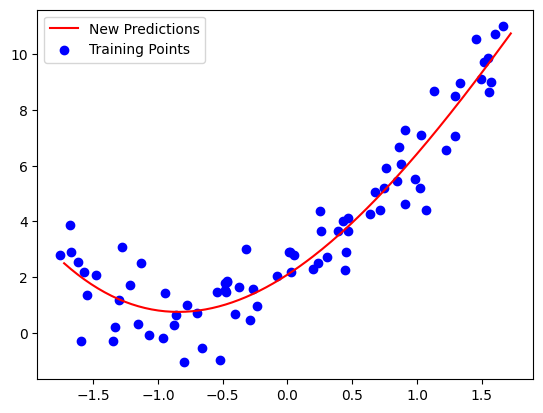

In [103]:
plt.plot(X_new, y_new_pred, color="r", label="New Predictions")
plt.scatter(X_train, y_train, color="b", label="Training Points")
plt.legend()
plt.show()

In [104]:
#Pipeline

In [123]:
def poly_regression(degree:int):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    pipeline = Pipeline(
        [
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
        ]
    )
    
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)

    print(f"Degree: {degree} - R2 Score: {score}")

    y_pred_new = pipeline.predict(X_new)

    plt.plot(X_new, y_pred_new, color="orange", label="New Predictions")
    plt.scatter(X_train, y_train, color="blue", label="Training Data")
    plt.scatter(X_test, y_test , color="green", label="Testing Data")
    plt.legend()
    plt.show()

Degree: 1 - R2 Score: 0.2705652535622246


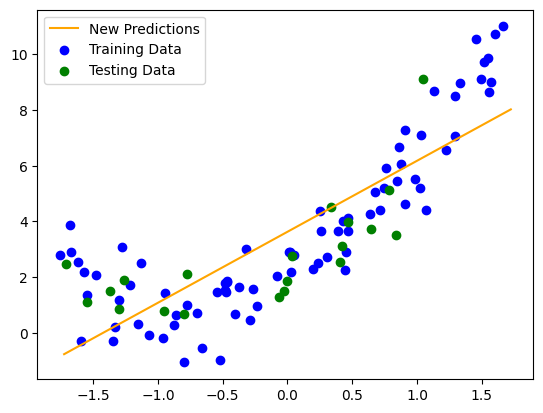

Degree: 2 - R2 Score: 0.7685687698788558


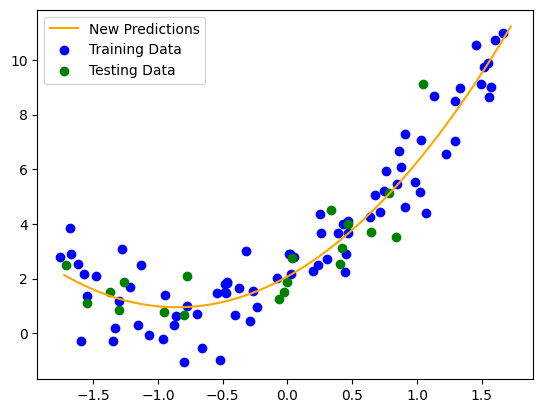

Degree: 3 - R2 Score: 0.7573443621401048


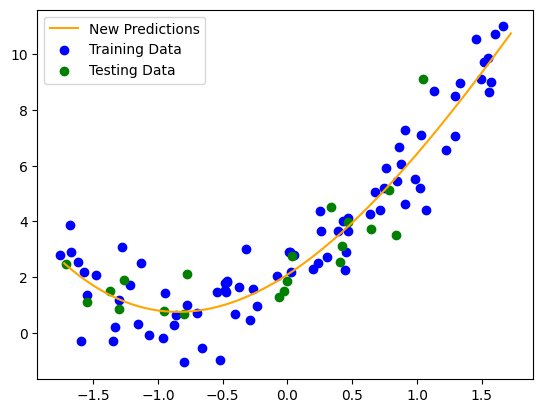

Degree: 4 - R2 Score: 0.7355034443260413


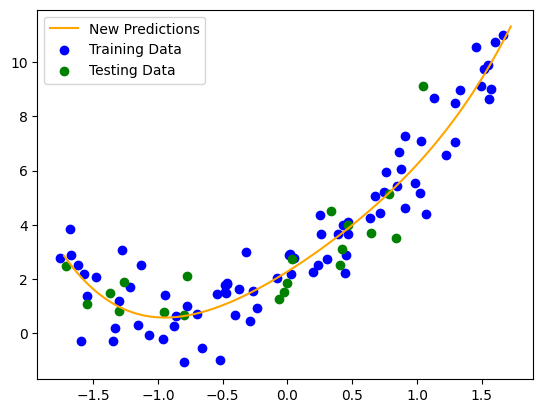

Degree: 5 - R2 Score: 0.7351244165095402


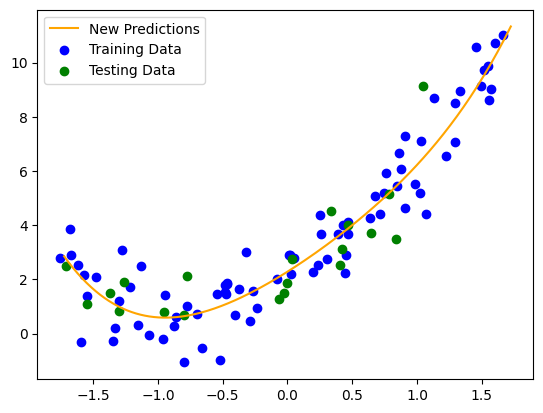

Degree: 6 - R2 Score: 0.734359048213343


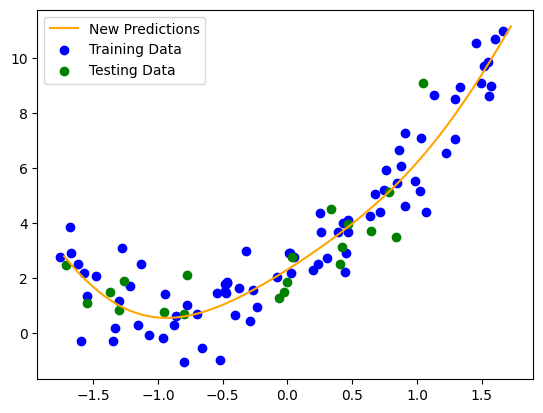

Degree: 7 - R2 Score: 0.7347819263549451


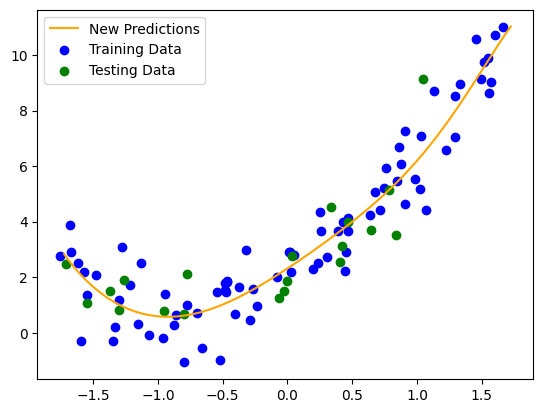

Degree: 8 - R2 Score: 0.7411422099998375


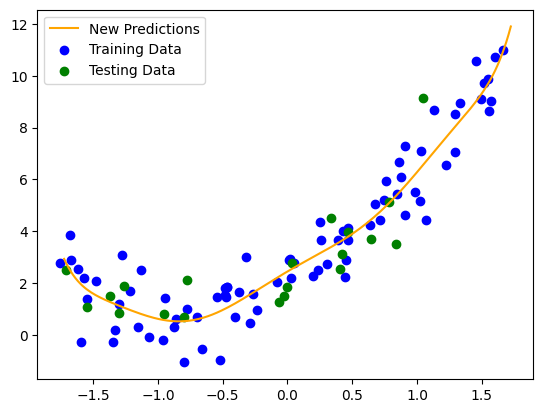

Degree: 9 - R2 Score: 0.7310763879815918


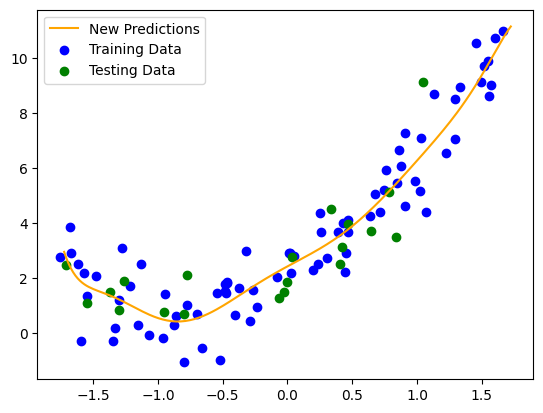

Degree: 10 - R2 Score: 0.728057862123283


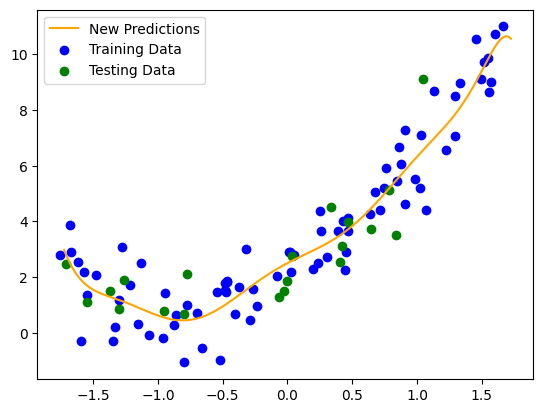

In [124]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)